In [25]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

* [Dark-matter halos and evolution of high-z early-type galaxies
HST Proposal 10174](https://archive.stsci.edu/proposal_search.php?id=10174&mission=hst)
* [Imaging the mass structure of distant lens galaxies
HST Proposal 10494](https://archive.stsci.edu/proposal_search.php?id=10494&mission=hst)
* [Dark Halos and Substructure from Arcs & Einstein Rings
HST Proposal 10798](https://archive.stsci.edu/proposal_search.php?id=10798&mission=hst)
* [Measuring the Mass Dependence of Early-Type Galaxy Structure
HST Proposal 10587](https://archive.stsci.edu/proposal_search.php?id=10587&mission=hst)
* [The Sloan Lens ACS Survey: Towards 100 New Strong Lenses
HST Proposal 10886](https://archive.stsci.edu/proposal_search.php?id=10886&mission=hst)

In [26]:
proposal_ids = ['10174', '10494', '10587', '10798', '10886']

In [27]:
from astroquery.mast import Observations
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [28]:
proposal_dict = {}

for proposal_id in proposal_ids:
    obs_table = Observations.query_criteria(proposal_id=proposal_id)
    proposal_dict[proposal_id] = obs_table

In [29]:
exposure_time_dict = {}
total = 0

for proposal_id, obs_table in proposal_dict.items():
    exposure_times = obs_table['t_exptime']
    total_exposure_time = np.nansum(exposure_times)
    exposure_time_dict[proposal_id] = total_exposure_time
    converted = str(timedelta(seconds=total_exposure_time))
    print(f'Proposal ID {proposal_id}: {total_exposure_time} seconds or {converted}')
    total += total_exposure_time

print(f'\nTotal time: {total} seconds or {timedelta(seconds=total)}')

Proposal ID 10174: 196560.0 seconds or 2 days, 6:36:00
Proposal ID 10494: 537717.004655 seconds or 6 days, 5:21:57.004655
Proposal ID 10587: 160440.0 seconds or 1 day, 20:34:00
Proposal ID 10798: 603070.4395600001 seconds or 6 days, 23:31:10.439560
Proposal ID 10886: 530663.0 seconds or 6 days, 3:24:23

Total time: 2028450.4442150001 seconds or 23 days, 11:27:30.444215


Getting the 0.6 years number for the duration of the Roman High Latitude Wide Area Survey from [this paper](https://ui.adsabs.harvard.edu/abs/2022ApJ...928....1W/abstract) which reports on a reference design of the High Latitude Spectroscopic Survey. It says that a companion paper will report on the High Latitude Imaging Survey, but I can't find that paper so maybe it never got published.

In [30]:
roman_hlwas_time_years = 0.6
roman_hlwas_time = roman_hlwas_time_years * 365.2422 * 24 * 60 * 60

print(f'Roman HLWAS: {roman_hlwas_time} seconds or {str(timedelta(seconds=roman_hlwas_time))}')

Roman HLWAS: 18934155.648 seconds or 219 days, 3:29:15.648000


Option to convert from seconds to another time unit, e.g. days

In [31]:
for proposal_id, exposure_time in exposure_time_dict.items():
    exposure_time_dict[proposal_id] = exposure_time / 86400

roman_hlwas_time /= 86400

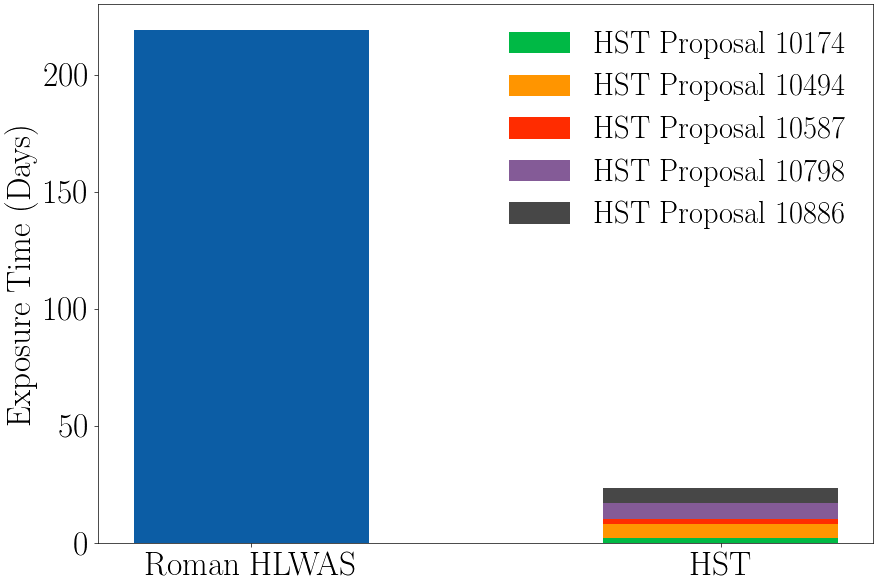

In [32]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

fig, ax = plt.subplots(figsize=(10,7))
width = 0.5
bottom = 0

ax.bar('Roman HLWAS', roman_hlwas_time, width)

hst_bar = ('HST')
for proposal_id, exposure_time in exposure_time_dict.items():
    label = f'HST Proposal {proposal_id}'
    p = ax.bar(hst_bar, exposure_time, width, label=label, bottom=bottom)
    bottom += exposure_time

ax.legend(loc='upper right', prop={'size': 22})
ax.set_ylabel('Exposure Time (Days)')

plt.savefig(os.path.join(repo_path, 'figures', 'exposure_time_comparison.png'))
plt.show()